# RandomForest Classifier

In [149]:
import numpy as np 
import pandas as pd

In [150]:
df = pd.read_csv("train.csv")

In [151]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [152]:
df.columns # exploring columns in the dataframe

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [153]:
df.loc[:,"toxic"].unique() # toxic column has only two uniue values i.e 0 and 1

array([0, 1])

In [154]:
categories = list(df.iloc[:,2:].columns) # slicing based on index and storing only the column names
categories

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [155]:
df1 = df.iloc[:,2:] # slicing all rows from second column
counts = []
for i in categories: # iterating over the categories
    counts.append((i, df1[i].sum()))    # appending the sum of 1's for each category in the 'counts' list of tuple

data = pd.DataFrame(counts, columns=["category", "no_of_comments"]) # converting a list to DataFrame
data   

,category,no_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


In [156]:
df.iloc[:, 2:].sum(axis=1).value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

<AxesSubplot:xlabel='category'>

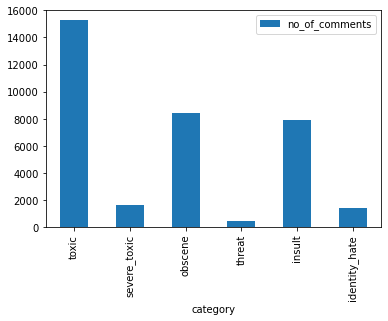

In [157]:
data.plot(x="category", y="no_of_comments", kind="bar")  

<BarContainer object of 7 artists>

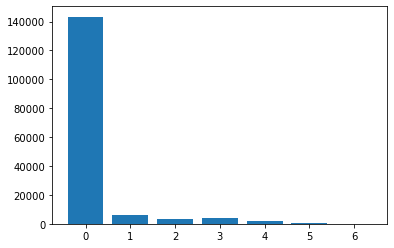

In [158]:
rowsums = df.iloc[:, 2:].sum(axis=1)
import matplotlib.pyplot as plt
plt.bar(rowsums.value_counts().reset_index()["index"],rowsums.value_counts().reset_index()[0])

In [159]:
df.shape

(159571, 8)

In [160]:
rowsums.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

In [161]:
df["comment_text"] = df["comment_text"].str.replace("\d","")
# The special character, \d, matches any digit character.

/var/folders/j7/lj6rcbh97jx8htwtr1mk9km80000gn/T/ipykernel_44966/1358182564.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["comment_text"] = df["comment_text"].str.replace("\d","")


In [162]:
import re
def cleaning(text):
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"\'ll","will", text)
    text = re.sub(r"\'m","am", text)
    text = re.sub("\s+", " ", text) # replace consecutive whitespace characters using the regular expression \s+
    text = re.sub("[^a-zA-Z]", " ", text) # single characters are converted to ' '
    # This regex expression states that match the text string for any alphabets from small a to small z or capital
    # A to capital Z. Adding a + sign after ']' would indicate that string should have at least 1 character.
    text = text.lower()
    return text

In [163]:
df["comment_text"] = df["comment_text"].apply(cleaning) # Apply a function along an axis of the DataFrame.

In [164]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour iam s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man iam really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can not make any real suggestions on ...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0


In [165]:
import nltk
from nltk.corpus import stopwords
list1 = stopwords.words("english")
list1.extend(['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaany',
 'aaaaaaaaaah',
 'aaaaaaaaaahhhhhhhhhhhhhh',
 'aaaaaaaaadm',
 'aaaaaaaaaq',
 'aaaaaaaacfo',
 'aaaaaaaaczy',
 'aaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaari',
 'aaaaaaaayui',
 'aaaaaaahhhhhhhhhhhhhhhhhhhhhhhh',
 'aaaaaaw',
 'aaaaah',
 'aaaah',
 'aaaannnnyyyywwwwhhhheeeerrrreeee',
 'aaaawwww',
 'aaaboyz',
 'aaages',
 'aaaghh',
 'aaah',
 'aaahhh',
 'aaahs',
 'aaai',
 'aaajade',
 'aaand',
 'aaarrrgggh',
 'aaaww',
 'aab',
 'aaba',])

In [166]:
list1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [167]:
df = df.iloc[:10000,:]

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
m2 = CountVectorizer(ngram_range=(1,2))
ngram = m2.fit_transform(df["comment_text"].values)
ngram

<10000x300475 sparse matrix of type '<class 'numpy.int64'>'
	with 1017152 stored elements in Compressed Sparse Row format>

In [169]:
print(m2.get_feature_names()[:8])

['aa', 'aa analysis', 'aa at', 'aa background', 'aa bt', 'aa does', 'aa for', 'aa giving']


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [170]:
count_values = ngram.toarray().sum(axis=0)
print(count_values)

[13  1  1 ...  1  1  1]


In [171]:
vocab = m2.vocabulary_
len(vocab.keys())

300475

In [172]:
vocab

{'explanation': 86443,
 'why': 287966,
 'the': 248440,
 'edits': 78457,
 'made': 148472,
 'under': 271171,
 'my': 161715,
 'username': 275233,
 'hardcore': 107590,
 'metallica': 155436,
 'fan': 88522,
 'were': 284264,
 'reverted': 213458,
 'they': 257622,
 'weren': 284806,
 'vandalisms': 276725,
 'just': 136160,
 'closure': 52749,
 'on': 178112,
 'some': 230020,
 'gas': 99656,
 'after': 5496,
 'voted': 279689,
 'at': 26311,
 'new': 165635,
 'york': 296872,
 'dolls': 74237,
 'fac': 87222,
 'and': 12207,
 'please': 193592,
 'don': 74337,
 'remove': 210335,
 'template': 244332,
 'from': 96891,
 'talk': 242688,
 'page': 186228,
 'since': 226636,
 'iam': 117825,
 'retired': 213060,
 'now': 171050,
 'explanation why': 86489,
 'why the': 288152,
 'the edits': 250321,
 'edits made': 78543,
 'made under': 148669,
 'under my': 271268,
 'my username': 162570,
 'username hardcore': 275248,
 'hardcore metallica': 107595,
 'metallica fan': 155437,
 'fan were': 88554,
 'were reverted': 284670,
 'reve

In [173]:
d2 = pd.DataFrame(sorted([(count_values[j], i) for i, j in vocab.items()],reverse=True)).rename(columns={0:"Frequency",1:"Unigram/Bigram"})

In [174]:
d2

,Frequency,Unigram/Bigram
0,31662,the
1,18877,to
2,14526,you
3,14352,of
4,14121,and
...,...,...
300470,1,aa does
300471,1,aa bt
300472,1,aa background
300473,1,aa at


In [175]:
list(d2[d2["Frequency"]==1]["Unigram/Bigram"])

# Naive Bayes Classifier
# Classification Specific to Text Data - About, Implementation


['zzzz aftah',
 'zzzz',
 'zzyzwicz talk',
 'zzyzwicz',
 'zzpzza correct',
 'zzpzza',
 'zyzzyxrd will',
 'zyzzyxrd',
 'zyuranger dairanger',
 'zyuranger',
 'zwyke tak',
 'zwyke',
 'zweng die',
 'zweng',
 'zwack gb',
 'zwack',
 'zuwandte empoerte',
 'zuwandte',
 'zuse ideas',
 'zuse as',
 'zurich airport',
 'zurich',
 'zun derivative',
 'zun',
 'zumblito these',
 'zumblito',
 'zuma spending',
 'zuma abused',
 'zulu is',
 'zulu',
 'zukav significant',
 'zukav',
 'zuden and',
 'zuden',
 'zuckerbergs the',
 'zuckerbergs',
 'zuckerberg the',
 'zuckerberg social',
 'zuckerberg http',
 'zuckerberg called',
 'zuckerberg and',
 'zuckerberg allegedly',
 'zuck yeah',
 'zuck yea',
 'zuck they',
 'zuck probably',
 'zuck people',
 'zuck just',
 'zuck have',
 'zuck ear',
 'zuck dumb',
 'zuck don',
 'zubrin proposed',
 'zubrin',
 'zu sehen',
 'zu schwarzenburg',
 'zu not',
 'zu for',
 'ztar are',
 'ztar',
 'zrh vandal',
 'zrh',
 'zoroastrian priest',
 'zoroastrian persians',
 'zoroastrian origin',
 'zo

In [176]:
X = df["comment_text"]
Y = df.iloc[:, 2:]

In [177]:
# Splitting the model into 80% Train and 20% Test Data
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=41)

In [178]:
# https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer(max_features=1000,
               analyzer="word",
               stop_words="english", norm="l2")

In [179]:
# The fit(data) method is used to compute the mean and std dev for a given feature to be used further for scaling.
# The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
# The fit_transform() method does both fits and transform.
xtrain_tfidf = model.fit_transform(xtrain)
xtest_tfidf = model.transform(xtest)

In [180]:
xtrain_tfidf

<8000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 109794 stored elements in Compressed Sparse Row format>

In [181]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [182]:
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of 
# the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size 
# is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to 
# build each tree.

a12 = RandomForestClassifier()
model1 = MultiOutputClassifier(estimator= a12)
model1.fit(xtrain_tfidf, ytrain)
# When data is fitted with an estimator, parameters are estimated from the data at hand. 
# model.fit() : fit training data. For supervised learning applications, this accepts two arguments: the data X 
# and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single 
# argument, the data X (e.g. model.fit(X)).

MultiOutputClassifier(estimator=RandomForestClassifier())

In [183]:
list3 = Y.columns

In [184]:
list3

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [187]:
from sklearn.metrics import accuracy_score, classification_report
pred = model1.predict(xtrain_tfidf)

print("Training Results")
for i in range(len(list3)):
    acc1 = accuracy_score(ytrain.iloc[:, i], pred[:,i])
    print(list3[i]+ "==>", acc1)

Training Results
toxic==> 0.995375
severe_toxic==> 0.9985
obscene==> 0.99825
threat==> 0.999875
insult==> 0.997
identity_hate==> 0.999125


In [188]:
pred = model1.predict(xtest_tfidf)

print("Test Results")
for i in range(len(list3)):
    acc1 = accuracy_score(ytest.iloc[:, i], pred[:,i])
    print(list3[i]+ "==>", acc1)

Test Results
toxic==> 0.936
severe_toxic==> 0.9905
obscene==> 0.9705
threat==> 0.996
insult==> 0.9645
identity_hate==> 0.995


# Naive Bayes Classifier

In [87]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [51]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['none'] = 1-train[label_cols].max(axis=1)
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,0.898321
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,0.302226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
# We prepare a Term Matrix documentation on the basis of Training data.
# Then we transform the test data on the basis of this matrix formed by the training data vocabulary.
# n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(xtrain)
test_term_doc = vec.transform(xtest)

In [191]:
# Here we print the Term Matrix Documentation for Training and Test Data 
# Here 159571 determines the number of rows/comments in the Training Data, while 426,005 determines the number of 
# unique words in the Training data
trn_term_doc, test_term_doc

(<8000x33549 sparse matrix of type '<class 'numpy.float64'>'
 	with 616629 stored elements in Compressed Sparse Row format>,
 <2000x33549 sparse matrix of type '<class 'numpy.float64'>'
 	with 144344 stored elements in Compressed Sparse Row format>)

In [192]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [193]:
# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)
print('Training Results')
for label in label_cols:
    y = ytrain[label]
    logreg.fit(trn_term_doc, y)
    y_pred_X = logreg.predict(trn_term_doc)
    print(label,'=> {}'.format(accuracy_score(y, y_pred_X)))

Training Results
toxic => 0.99925
severe_toxic => 0.99875
obscene => 0.99975
threat => 0.99925
insult => 0.999375
identity_hate => 0.999125


In [194]:
print('Test Results')
for label in label_cols:
    y = ytest[label]
    y_pred_X = logreg.predict(test_term_doc)
    print(label,'=> {}'.format(accuracy_score(y, y_pred_X)))

Test Results
toxic => 0.9095
severe_toxic => 0.9925
obscene => 0.9545
threat => 0.9975
insult => 0.955
identity_hate => 0.995


# LSTM

In [195]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [196]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = ytrain[list_classes].values
list_sentences_train = xtrain
list_sentences_test = xtest

In [197]:
y

array([[1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [198]:
max_features = 2_000 # Defining the maximum number of unique words in the dictionary.
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [199]:
maxlen = 1403 # Fixing the length of each sentence to 1403 so we do not loose on useful features.
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [200]:
# Checking the distribution of the number of words in sentences.
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

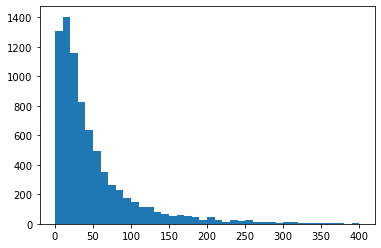

In [201]:
# We see count of comments/instances on y axis as per the number of words in them.
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [202]:
inp = Input(shape=(maxlen, ))

In [203]:
embed_size = 100
x = Embedding(max_features, embed_size)(inp)
# max_features - Size of the vocabulary
# embed_size - Output size of the Comment (also Output Size of the Embedded Layer)

In [204]:
# required input dimensions=60
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [205]:
x = GlobalMaxPool1D()(x)

In [206]:
x = Dropout(0.1)(x)

In [207]:
x = Dense(50, activation="relu")(x)

In [208]:
x = Dropout(0.1)(x)

In [209]:
x = Dense(6, activation="sigmoid")(x)

In [210]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [211]:
batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
225/225 [==============================] - 86s 374ms/step - loss: 0.2000 - accuracy: 0.5832 - val_loss: 0.1514 - val_accuracy: 0.9925
Epoch 2/2
225/225 [==============================] - 82s 362ms/step - loss: 0.1449 - accuracy: 0.7660 - val_loss: 0.1306 - val_accuracy: 0.9925


In [212]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1403)]            0         
                                                                 
 embedding_4 (Embedding)     (None, 1403, 100)         200000    
                                                                 
 lstm_layer (LSTM)           (None, 1403, 60)          38640     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 60)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_6 (Dropout)         (None, 60)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                3050      
                                                           

In [213]:
y_pred =model.predict(X_te, batch_size=batch_size)

63/63 [==============================] - 9s 139ms/step


In [214]:
y_pred

array([[0.08377764, 0.01279071, 0.04693026, 0.00334716, 0.04095143,
        0.0082232 ],
       [0.13934042, 0.01979189, 0.07248167, 0.00598521, 0.07342702,
        0.01369744],
       [0.09229115, 0.01348989, 0.04824023, 0.00390115, 0.04745666,
        0.00846933],
       ...,
       [0.05461282, 0.00854694, 0.03409029, 0.00234724, 0.02751591,
        0.00617564],
       [0.05975499, 0.00993711, 0.03782484, 0.0027821 , 0.03053864,
        0.00693227],
       [0.07863412, 0.01203053, 0.04197321, 0.00354693, 0.03779859,
        0.00794137]], dtype=float32)

In [215]:
y_pred_x_new = []
for row in y_pred:
    row_new = []
    for j in range(len(row)):
        if row[j] >= 0.5:
            row_new.append(1)
        else:
            row_new.append(0)
    y_pred_x_new.append(row_new)
y_pred_x_new

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0,

In [216]:
Y = df.iloc[:, 2:]
list3 = Y.columns
list3

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [217]:
y_pred_x_new_df=pd.DataFrame(columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate'])
y_pred_x_new_df

,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [218]:
for i in y_pred_x_new:
    y_pred_x_new_df.loc[len(y_pred_x_new_df.index)]=i

In [219]:
from sklearn.metrics import accuracy_score

In [220]:
print("Test Results")
for i in range(len(list3)):
    acc1 = accuracy_score(ytest.iloc[:, i], y_pred_x_new_df.iloc[:,i])
    print(list3[i]+ "==>", acc1)

Test Results
toxic==> 0.909
severe_toxic==> 0.993
obscene==> 0.955
threat==> 0.998
insult==> 0.9555
identity_hate==> 0.9945
